In [66]:
from Data_cleaning import clean_paloalto

In [67]:
c = clean_paloalto() 
data = c.clean_data() 

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (29,30,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\User\OneDrive - Danmarks Tekniske Universitet\SAS_030919\6. Semester\BSc\Bachelor2021\Data_cleaning.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Charge Duration (mins)"][df["Charge Duration (mins)"]==" -   "]=0


In [68]:
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation
0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,1900-01-01 03:03:32,1900-01-01 01:54:03,6.249457,...,-122.1603,USD,0.0,Plug Out at Vehicle,3,95124,184,114.0,0,37.4446x-122.1603
1,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,1900-01-01 00:02:06,1900-01-01 00:01:54,0.106588,...,-122.1603,USD,0.0,Customer,4,94301,2,2.0,0,37.4446x-122.1603
2,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,1900-01-01 04:17:32,1900-01-01 04:17:28,14.951777,...,-122.1603,USD,0.0,Plug Out at Vehicle,5,94301,258,257.0,0,37.4446x-122.1603
3,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,1900-01-01 02:03:24,1900-01-01 02:02:58,7.159643,...,-122.1603,USD,0.0,Customer,6,94302,123,123.0,0,37.4446x-122.1603
4,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,1900-01-01 01:11:24,1900-01-01 00:43:54,1.957765,...,-122.1603,USD,0.0,Plug Out at Vehicle,7,94043,71,44.0,0,37.4446x-122.1603


In [69]:
data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'Park Duration (mins)', 'Charge Duration (mins)', 'ID', 'Pairlocation'],
      dtype='object')

Extract 2016 
Discretize time 
aktivt välja att vi tar charge/hour som total kWh/time ?? 


Vi vill modellera energy demand per time. Doing so we need to extracct energy consumption per time unit from historical data. How do we handle consumprions that stretches over several time units? 

- divide the total consumption over total time <b>(not taking into account that kWh consumption isn't constant)</b>



In [70]:
#Extracting the station with the most consumption in year 2016 (2016 is seen as a good stable year)
data['StartYear'] = data['Start Date'].dt.year

df16 = data[data['StartYear'] == 2016]
df16.head()
#data.groupby('Station Name')['Energy (kWh)'].sum()
#data['Station Name'].unique()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
49689,PALO ALTO CA / RINCONADA LIB 1,000D6F00009DCC2B,City of Palo Alto,2016-01-01 02:00:00,PST,2016-01-01 12:04:00,PST,1900-01-01 10:04:05,1900-01-01 03:05:30,10.072230,...,USD,0.0,Customer,1356,94303,604,186.0,13,37.4455x-122.1389,2016
49690,PALO ALTO CA / BRYANT #2,000D6F00009DCFC3,City of Palo Alto,2016-01-01 09:26:00,PST,2016-01-01 11:19:00,PST,1900-01-01 01:53:20,1900-01-01 01:29:35,2.744629,...,USD,0.0,Plug Out at Vehicle,6652,94301,113,90.0,5,37.4465x-122.1621,2016
49691,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,City of Palo Alto,2016-01-01 09:55:00,PST,2016-01-01 10:49:00,PST,1900-01-01 00:54:13,1900-01-01 00:53:55,5.233959,...,USD,0.0,Customer,9684,95070,54,54.0,4,37.4466x-122.1623,2016
49692,PALO ALTO CA / MPL #6,000D6F00015B7509,City of Palo Alto,2016-01-01 10:13:00,PST,2016-01-01 12:05:00,PST,1900-01-01 01:52:40,1900-01-01 01:52:29,11.342517,...,USD,0.0,Plug Out at Vehicle,2073,94306,113,112.0,7,37.4221x-122.1135,2016
49693,PALO ALTO CA / WEBSTER #1,0024B10000021146,City of Palo Alto,2016-01-01 10:42:00,PST,2016-01-01 13:59:00,PST,1900-01-01 03:16:27,1900-01-01 03:16:09,16.388630,...,USD,0.0,Plug Out at Vehicle,1368,94301,196,196.0,15,37.4483x-122.1583,2016


In [71]:
df16.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'Park Duration (mins)', 'Charge Duration (mins)', 'ID', 'Pairlocation',
       'StartYear'],
      dtype='object')

In [72]:
print(data['Org Name'].unique())
print(df16['Org Name'].unique()) #can be removed 
print(df16['Start Time Zone'].unique()) #can NOT be removed Pacific Standard Time, Coordinated Universal Time, Pacific Daylight Time
print(df16['End Time Zone'].unique())

['City of Palo Alto' 'City of Palo Alto ']
['City of Palo Alto ']
['PST' 'UTC' 'PDT']
['PST' 'PDT']


In [73]:
df16['Charge Duration (mins)'].mean()

123.34431721148162

In [74]:
(24*60)/15 * 365 * 7 * 44


10792320.0

To start with we'll go for 2hrs time slots... 

In [75]:
sumconsumption = df16.groupby('Station Name')['Energy (kWh)'].sum()
print(max(sumconsumption))
print(sumconsumption)
#sumconsumption.sort_values(by = 'Energy (kWh)')
#df.sort_values(by='col1', ascending=False)

33766.97732900003
Station Name
PALO ALTO CA / BRYANT #1          12771.818042
PALO ALTO CA / BRYANT #2          15290.817176
PALO ALTO CA / BRYANT #3          12216.293064
PALO ALTO CA / CAMBRIDGE #1       18909.576301
PALO ALTO CA / CAMBRIDGE #2       18801.763954
PALO ALTO CA / HAMILTON #1        15338.749379
PALO ALTO CA / HAMILTON #2        30452.580047
PALO ALTO CA / HIGH #1            30400.605671
PALO ALTO CA / HIGH #4            13333.914978
PALO ALTO CA / MPL #1              3453.271555
PALO ALTO CA / MPL #2              4348.937078
PALO ALTO CA / MPL #3              4269.087412
PALO ALTO CA / MPL #4             16032.264397
PALO ALTO CA / MPL #5             16827.715245
PALO ALTO CA / MPL #6             18538.468437
PALO ALTO CA / RINCONADA LIB 1    15589.518614
PALO ALTO CA / RINCONADA LIB 2    14051.901026
PALO ALTO CA / RINCONADA LIB 3    16183.243090
PALO ALTO CA / TED THOMPSON #1    21250.437331
PALO ALTO CA / WEBSTER #1         33005.180078
PALO ALTO CA / WEBSTER #2    

PALO ALTO CA / WEBSTER #2 is the station with the highest total consumption in 2016.     

In [76]:
df16one = df16[df16['Station Name'] == 'PALO ALTO CA / WEBSTER #2']
df16one.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
49698,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 11:48:00,PST,2016-01-01 15:39:00,PST,1900-01-01 03:50:05,1900-01-01 01:32:09,3.034643,...,USD,0.0,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016
49710,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 13:43:00,PST,2016-01-01 17:28:00,PST,1900-01-01 03:45:05,1900-01-01 03:44:35,12.427662,...,USD,0.0,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016
49732,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-01 22:43:00,PST,2016-01-02 10:31:00,PST,1900-01-01 11:47:56,1900-01-01 01:50:59,10.752058,...,USD,0.0,Plug Out at Vehicle,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016
49736,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 07:09:00,PST,2016-01-02 09:38:00,PST,1900-01-01 02:28:49,1900-01-01 02:28:40,11.160776,...,USD,0.0,Plug Out at Vehicle,1220,94303,149,149.0,17,37.4482x-122.1582,2016
49745,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-01-02 10:29:00,PST,2016-01-02 13:05:00,PST,1900-01-01 02:36:21,1900-01-01 02:36:00,10.298505,...,USD,0.0,Plug Out at Vehicle,1221,95123,156,156.0,17,37.4482x-122.1582,2016


In [77]:
df16one['MAC Address'].unique()

array(['0024B100000207FA'], dtype=object)

In [78]:
df16one = df16one.set_index('Start Date')
df16one.sort_index()

,Station Name,MAC Address,Org Name,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,Park Duration (mins),Charge Duration (mins),ID,Pairlocation,StartYear
Start Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 11:48:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-01-01 15:39:00,PST,1900-01-01 03:50:05,1900-01-01 01:32:09,3.034643,1.275,...,USD,0.0,Customer,1216,94024,230,92.0,17,37.4482x-122.1582,2016
2016-01-01 13:43:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-01-01 17:28:00,PST,1900-01-01 03:45:05,1900-01-01 03:44:35,12.427662,5.220,...,USD,0.0,Plug Out at Vehicle,1219,94025,225,225.0,17,37.4482x-122.1582,2016
2016-01-01 22:43:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-01-02 10:31:00,PST,1900-01-01 11:47:56,1900-01-01 01:50:59,10.752058,4.516,...,USD,0.0,Plug Out at Vehicle,1451717005,94301,708,111.0,17,37.4482x-122.1582,2016
2016-01-02 07:09:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-01-02 09:38:00,PST,1900-01-01 02:28:49,1900-01-01 02:28:40,11.160776,4.688,...,USD,0.0,Plug Out at Vehicle,1220,94303,149,149.0,17,37.4482x-122.1582,2016
2016-01-02 10:29:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-01-02 13:05:00,PST,1900-01-01 02:36:21,1900-01-01 02:36:00,10.298505,4.325,...,USD,0.0,Plug Out at Vehicle,1221,95123,156,156.0,17,37.4482x-122.1582,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 14:53:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-12-31 19:51:00,PST,1900-01-01 04:58:07,1900-01-01 02:49:09,16.557000,6.954,...,USD,0.0,Plug Out at Vehicle,4215,94301,298,169.0,17,37.4482x-122.1582,2016
2016-12-31 15:01:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-12-31 17:14:00,PST,1900-01-01 02:12:50,1900-01-01 02:12:36,13.012000,5.465,...,USD,0.0,Plug Out at Vehicle,4216,94087,133,133.0,17,37.4482x-122.1582,2016
2016-12-31 17:49:00,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,PST,2016-12-31 19:59:00,PST,1900-01-01 02:09:34,1900-01-01 01:30:50,2.970000,1.247,...,USD,0.0,Plug Out at Vehicle,4217,94539,130,91.0,17,37.4482x-122.1582,2016


In [92]:
dftest = df16one.resample('2H').sum()
dftest

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Charge Duration (mins),ID,StartYear
Start Date,,,,,,,,,,,,
2016-01-01 10:00:00,3.034643,1.275,0.381,2,94301,37.4482,-122.1582,0.0,1216,92.0,17,2016
2016-01-01 12:00:00,12.427662,5.220,1.560,1,94301,37.4482,-122.1582,0.0,1219,225.0,17,2016
2016-01-01 14:00:00,0.000000,0.000,0.000,0,0,0.0000,0.0000,0.0,0,0.0,0,0
2016-01-01 16:00:00,0.000000,0.000,0.000,0,0,0.0000,0.0000,0.0,0,0.0,0,0
2016-01-01 18:00:00,0.000000,0.000,0.000,0,0,0.0000,0.0000,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 14:00:00,29.569000,12.419,3.711,3,188602,74.8964,-244.3164,0.0,8431,302.0,34,4032
2016-12-31 16:00:00,2.970000,1.247,0.373,2,94301,37.4482,-122.1582,0.0,4217,91.0,17,2016
2016-12-31 18:00:00,0.000000,0.000,0.000,0,0,0.0000,0.0000,0.0,0,0.0,0,0


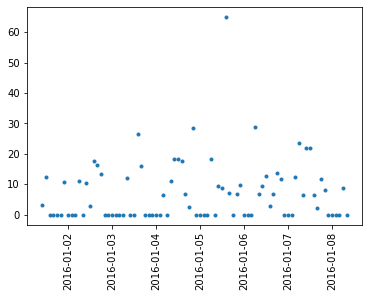

In [95]:
dfjan = dftest[0:12*7]

import matplotlib.pyplot as plt 
plt.plot(dfjan['Energy (kWh)'], '.')
plt.xticks(rotation = 'vertical')
plt.show()